In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Домашнее задание №1: визуализация, k-NN регрессия, кросс-валидация.

В этом задании мы рассмотрим задачу прогнозирования количества взятых в аренду велосипедов.

Файл [bike_sharing.csv](https://yadi.sk/d/n8iy_trO3EsUBa) содержит данные о 731 дне работы сервиса по аренде велосипедов. Про каждый день известны:

* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius from 0 to 100.
- atemp: Normalized feeling temperature in Celsius from 0 to 100.
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

**1. (0.25 балла)** Откройте файл bike_sharing.csv, запишите в датафрейм df и выведите первые пять строк датафрейма.

In [2]:
df = pd.read_csv("/home/alex/Downloads/bike_sharing.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head(5)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,34.4167,36.3625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,36.3478,35.3739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,19.6364,18.9405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,20.0000,21.2122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,22.6957,22.9270,0.436957,0.186900,82,1518,1600


**2. (1 балл)** Постройте график среднего числа арендованных байков (cnt) по каждому месяцу. Не забудьте подписать оси координат. Убедитесь, что в летние месяцы велосипеды в прокат берут чаще.

In [4]:
 a=list(set(df["mnth"]))
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [5]:
mean_bikes = df.groupby("mnth")["cnt"].mean()


In [6]:
b = list(mean_bikes)

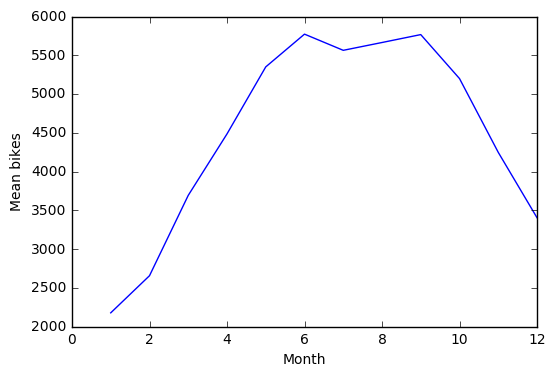

In [7]:
plt.xlabel("Month")
plt.ylabel("Mean bikes")
plt.plot(a,b)

**В летние месяцы 6-ой, 7-ой, 8-ой, берут больше велосипедов чем в остальные**

** 3. (0.5 балла)** Постройте диаграмму рассеяния (scatter plot) с осями cnt и atemp, где точки — это объекты. Какой логичный вывод можно сделать по этому графику?

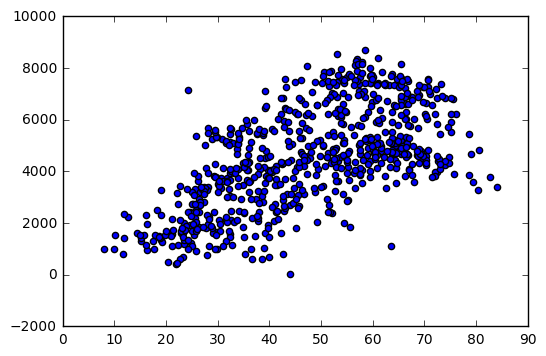

In [8]:
a1 = list(df["atemp"])
b1 = list(df["cnt"])
plt.scatter(a1,b1)

**Чем теплее тем больше берут велосипедов.**

**4. (0.5 балла)** Преобразуйте небинарные категориальные признаки с помощью one-hot кодирования. Сделать это можно с помощью функции pd.get_dummies, указав нужные столбцы в параметре columns. Сколько признаков получилось после кодирования? И какой категориальный признак породил больше всего бинарных?

In [9]:
df = pd.get_dummies(df, columns = ["weathersit","mnth","season","weekday"])

In [10]:
df.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'season_1', 'season_2', 'season_3', 'season_4', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [11]:
len(df.columns)

38

**Получилось 38 признаков. Больше всего бинарных признаков дал категориальный признак "Month"**

**5. (0.25 балла)** Удалите столбцы instant, dteday, casual и registered. Предположите, почему мы удаляем эти признаки.

In [12]:
df.drop('instant', axis=1, inplace=True)
df.drop('dteday', axis=1, inplace=True)
df.drop('casual', axis=1, inplace=True)
df.drop('registered', axis=1, inplace=True)

In [13]:
df.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_1,weathersit_2,...,season_2,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,34.4167,36.3625,0.805833,0.160446,985,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,36.3478,35.3739,0.696087,0.248539,801,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,19.6364,18.9405,0.437273,0.248309,1349,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,20.0000,21.2122,0.590435,0.160296,1562,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,1,22.6957,22.9270,0.436957,0.186900,1600,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
len(df.columns)

34

**Instant - незначаящий признак, это просто номер записи. Dteday - не вещественный, к тому же есть признаки yr, mnth, weekday, которые вполне заменяют его. Casual + registered = cnt**

**6. (0.5 балла)** Далее нашей целевой переменной будет количество арендованных велосипедов (cnt). Поэтому запишите cnt в переменную df_ans и удалите из df. Затем в помощью функции train_test_split из sklearn.model_selection разделите выборку на обучающую и контрольную в отношении 7 к 3, создав переменные X_train, X_test, y_train, y_test.

Замечание 1: установите random_seed, чтобы генератор псевдослучайных чисел работал всегда одинаково.

Замечание 2: если в sklearn.model_selection нет функции train_test_split, обновите scikit-learn.

In [15]:
df_ans = df["cnt"].values
df.drop('cnt', axis=1, inplace=True)


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df,df_ans,test_size=0.3,random_state=23)

**7. (1 балл)** Обучите алгоритм пяти ближайших соседей с евклидовой метрикой и оцените MAE на контрольной выборке.

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
knn = KNeighborsRegressor(n_neighbors=5,metric='euclidean')

In [20]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [21]:
y_pred=knn.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
mean_absolute_error(y_test,y_pred)

996.22363636363639

**8. (0.5 балла)** Постройте диаграмму рассеяния (scatter plot), по одной оси отметив настоящее число аренд велосипедов, а по другой — предсказанное алгоритмом. Дополнительно на этом графике постройте прямую $y = x$. Чему соотстветствует отклонение от этой прямой?

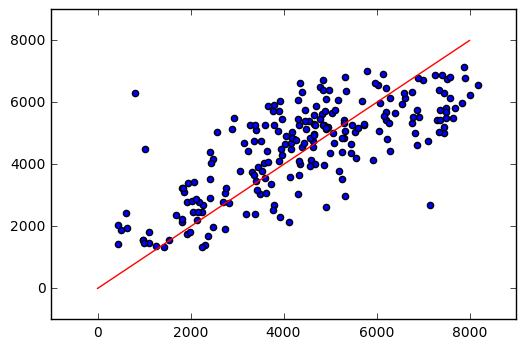

In [24]:
plt.scatter(y_test,y_pred)
plt.plot([0,8000],[0,8000],c="red")

**отклонение от прямой означает отклонение предсказанных ответов от настоящих**

**9. (1 балл)** Отмасштабируйте признаки, чтобы они принимали значения на $[0, 1]$.

Это можно сделать собственноручно с помощью операций pandas.

Иначе — можно использовать MinMaxScaler из sklearn.preprocessing — класс с методами fit и transform. 
Для этого:

* либо соедините X_train и X_test обратно в единый датафрейм, отмасштабируйте и разъедините обратно,
* либо отмасштабируйте df (без ответов) и разделите на обучающую и контрольную выборку, используя тот же random_seed.

На выходе метода transform получится numpy-массив, который нужно будет превратить обратно в датафрейм.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
scaler.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
newdf = pd.DataFrame(scaler.transform(df))

In [29]:
newdf.columns=df.columns
newdf.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,weathersit_1,weathersit_2,weathersit_3,...,season_2,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.0,0.0,0.0,0.355170,0.373517,0.828620,0.284606,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.379232,0.360541,0.715771,0.466215,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.171000,0.144830,0.449638,0.465740,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.175530,0.174649,0.607131,0.284297,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.209120,0.197158,0.449313,0.339143,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(newdf,df_ans,test_size=0.3,random_state=23)

In [31]:
newdf.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'season_1', 'season_2', 'season_3',
       'season_4', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

**10. (0.5 балла)** Вновь обучите алгоритм пяти ближайших соседей с евклидовой метрикой и оцените MAE на контрольной выборке. Почему качество поменялось?

In [32]:
knn_new = KNeighborsRegressor(n_neighbors=5,metric='euclidean')

In [33]:
knn_new.fit(new_X_train,new_y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [34]:
new_y_pred = knn_new.predict(new_X_test)

In [35]:
mean_absolute_error(new_y_pred,new_y_test)

968.83272727272731

**Качество изменилось, так как в предыдущей модели "большие" признаки большле влияли на ответ, чего быть не должно,
так как некоторые признаки имеют бОльшие значения по своей "природе", но это не значит, что они являются определяющими и должны больше влиять на ответ.**

**11. (1.25 балла)** Используя класс KFold из sklearn.model_selection установите с помощью кросс-валидации на пяти фолдах, какой параметр weights лучше с точки зрения mean absolute error. 

In [36]:
from sklearn.model_selection import KFold

In [37]:
knn_uni=KNeighborsRegressor(n_neighbors=5,weights='uniform')
knn_dist = KNeighborsRegressor(n_neighbors=5,weights='distance')

In [38]:
kf = KFold(n_splits=5)

In [39]:
kf_pred_uni=np.zeros(df_ans.shape)

In [40]:
kf_pred_dist=np.zeros(df_ans.shape)
kf_pred_dist.shape

(731,)

In [41]:
kf.get_n_splits(newdf)

5

In [42]:

for train, test in kf.split(newdf):
    knn_uni.fit(newdf.ix[train],df_ans[train])
    kf_pred_uni[test] = knn_uni.predict(newdf.ix[test])
   


In [43]:
kf1=KFold(n_splits=5)
kf1.get_n_splits(newdf)


5

In [44]:
for train, test in kf1.split(newdf):
    knn_dist.fit(newdf.ix[train],df_ans[train])
    kf_pred_dist[test] = knn_dist.predict(newdf.ix[test])
    

In [45]:
mean_absolute_error(kf_pred_uni,df_ans)

1746.2637482900138

In [46]:
mean_absolute_error(kf_pred_dist,df_ans)

1743.6585606918657

**distance лучше чем uniform**

**12. (2.5 балла)** С помощью GridSearchCV из sklearn.model_selection на пяти фолдах выберите лучшее значение $k$ от 1 до 50. Постройте график MAE на кросс-валидации в зависимости от $k$. 

Замечание: Передать нужную метрику качества для GridSearchCV можно через параметр scoring, но не всё так просто. Из метрики качества нужно сделать «scorer» c помощью функции sklearn.metrics.make_scorer, не забыв указать нужное значение greater_is_better.

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
from sklearn.metrics import make_scorer

In [49]:
scorer = make_scorer(mean_absolute_error,greater_is_better=False)

In [65]:
cv = GridSearchCV(KNeighborsRegressor(metric='euclidean'),param_grid={"n_neighbors":np.arange(1,51),"weights":['uniform','distance']},scoring=scorer,cv=5)

In [66]:
cv.fit(newdf,df_ans)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=0)

In [67]:
cv.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=46, p=2,
          weights='uniform')

In [68]:
cv.best_score_

-1446.4277344911675

In [101]:
nnn = np.array(cv.grid_scores_)

/home/alex/anaconda3/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [148]:
uni_k=nnn[::2]
dist_k=nnn[1::2]


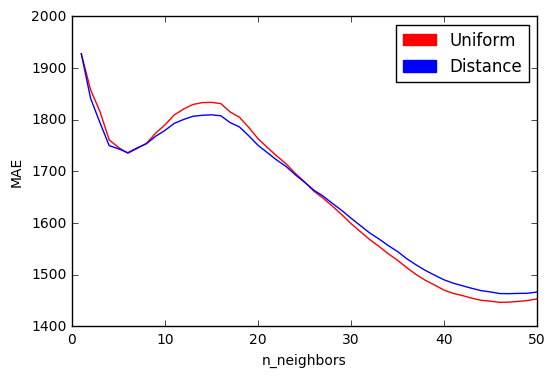

In [165]:
import matplotlib.patches as mpatches
plt.ylabel("MAE")
plt.xlabel("n_neighbors")
plt.plot(np.arange(1,51),uni_k[:,1]*(-1),'r')
plt.plot(np.arange(1,51),dist_k[:,1]*(-1),'b')
red_patch = mpatches.Patch(color='red', label='Uniform')
blue_patch = mpatches.Patch(color='blue', label='Distance')
plt.legend(handles=[red_patch,blue_patch])
plt.show()

**Как показывают результаты, лучший алгоритм имеет веса 'uniform' и n_neighbors=46**

**13. (0.25 балла)** Посчитайте качество итоговой модели на контрольной выборке. 

In [55]:
fin_knn=KNeighborsRegressor(weights='uniform',n_neighbors=46,metric='euclidean')

In [56]:
fin_pred=np.zeros(df_ans.shape)

In [57]:
fin_kf=KFold(n_splits=5)

In [58]:
fin_kf.get_n_splits(newdf)

5

In [59]:
for train, test in fin_kf.split(newdf):
    fin_knn.fit(newdf.ix[train],df_ans[train])
    fin_pred[test] = fin_knn.predict(newdf.ix[test])
    

**MAE конечной модели на кросс-валидации**

In [60]:
mean_absolute_error(fin_pred,df_ans)

1446.4277344911675